## Exercise 2

### Import needed modules

In [1]:
import numpy as np
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import os

sns.set()

### Define the non-linear toy problem
Toy problem:
14X^2 + 5Y^2 +19Z^2 - 5

In [2]:
def function(x,y,z):
    return 14*x**2 + 5*y**2 + 19*z**2 -5

### Generate random values and use the toy problem

In [3]:
X = np.random.rand(1000,3)
y = function(X[:,0],X[:,1],X[:,2])
X[0:10,:]

array([[0.76334256, 0.10168314, 0.43969561],
       [0.96387321, 0.04580806, 0.90638313],
       [0.71759358, 0.45586979, 0.69927015],
       [0.34822355, 0.71684377, 0.84565076],
       [0.09339152, 0.08341695, 0.7372372 ],
       [0.12189905, 0.3035795 , 0.05032143],
       [0.55059799, 0.47406392, 0.16967947],
       [0.87597412, 0.97961952, 0.49194998],
       [0.42447914, 0.36388671, 0.01780682],
       [0.79122188, 0.96583441, 0.78139434]])

### Verify y Values

In [4]:
y[0:10]

array([ 6.88269579, 23.62629106, 12.53884992, 12.85433877,  5.4837548 ,
       -4.28305348,  0.9149284 , 15.13918216, -1.80935217, 20.02959439])

### Split data for training, test and validation

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=0)

### Define the connection of the nodes in the network

In [6]:
#Define the input with 3 features x,y,z
input_ = tf.keras.layers.Input(shape=(3,))
#Create dense layers:
dense1 = tf.keras.layers.Dense(70, activation='relu')(input_)
dense2 = tf.keras.layers.Dense(70, activation = 'relu')(dense1)
output_ = tf.keras.layers.Dense(1)(dense2)

### Define a model from the input node to the last node

In [7]:
model = tf.keras.Model(inputs=input_, outputs=output_)

### Verify the structure of the model

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 70)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 70)                4970      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 71        
Total params: 5,321
Trainable params: 5,321
Non-trainable params: 0
_________________________________________________________________


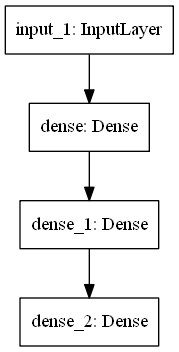

In [9]:
tf.keras.utils.plot_model(model)

### Initialize Callbacks

In [10]:
#define early stop callbacks based on loss metric
early_stop = tf.keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True)

#define Model checkpoint Callback
MODEL_PATH = 'checkpoints/model_at_{epoch:02d}.mdl'
os.makedirs(os.path.dirname(MODEL_PATH), exist_ok=True)
model_checkpoint =tf.keras.callbacks.ModelCheckpoint(MODEL_PATH)

### Compile the model by providing the optimization algorithm and the loss function

In [11]:
opt = tf.keras.optimizers.Adam(learning_rate=0.004)
#Add Mean absolute error as metric
model.compile(loss='mse', optimizer=opt, metrics=[tf.keras.metrics.MeanAbsoluteError()] )

### Verify split data

In [12]:
print(f'train_X: {train_X.shape}')
print(f'test_: {test_X.shape}')
print(f'train_y: {train_y.shape}')
print(f'test_y: {test_y.shape}')

train_X: (800, 3)
test_: (200, 3)
train_y: (800,)
test_y: (200,)


### Define the training arguments in the model

In [13]:
training_history=model.fit(train_X, train_y, batch_size=10, epochs=200,
                          validation_split=0.125, callbacks=[early_stop, model_checkpoint])

Epoch 1/200
70/70 [==============================] - 1s 6ms/step - loss: 70.9629 - mean_absolute_error: 6.4281 - val_loss: 18.3128 - val_mean_absolute_error: 3.6442
INFO:tensorflow:Assets written to: checkpoints\model_at_01.mdl\assets
Epoch 2/200
70/70 [==============================] - 0s 2ms/step - loss: 11.0290 - mean_absolute_error: 2.6954 - val_loss: 1.8315 - val_mean_absolute_error: 1.1245
INFO:tensorflow:Assets written to: checkpoints\model_at_02.mdl\assets
Epoch 3/200
70/70 [==============================] - 0s 1ms/step - loss: 1.8872 - mean_absolute_error: 1.1117 - val_loss: 0.7414 - val_mean_absolute_error: 0.6682
INFO:tensorflow:Assets written to: checkpoints\model_at_03.mdl\assets
Epoch 4/200
70/70 [==============================] - 0s 1ms/step - loss: 0.8128 - mean_absolute_error: 0.7064 - val_loss: 0.4310 - val_mean_absolute_error: 0.5281
INFO:tensorflow:Assets written to: checkpoints\model_at_04.mdl\assets
Epoch 5/200
70/70 [==============================] - 0s 1ms/step 

70/70 [==============================] - 0s 1ms/step - loss: 0.0256 - mean_absolute_error: 0.1221 - val_loss: 0.1673 - val_mean_absolute_error: 0.3495
INFO:tensorflow:Assets written to: checkpoints\model_at_36.mdl\assets
Epoch 37/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0761 - mean_absolute_error: 0.2116 - val_loss: 0.0441 - val_mean_absolute_error: 0.1612
INFO:tensorflow:Assets written to: checkpoints\model_at_37.mdl\assets
Epoch 38/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0707 - mean_absolute_error: 0.2016 - val_loss: 0.0221 - val_mean_absolute_error: 0.1101
INFO:tensorflow:Assets written to: checkpoints\model_at_38.mdl\assets
Epoch 39/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0152 - mean_absolute_error: 0.0951 - val_loss: 0.0313 - val_mean_absolute_error: 0.1339
INFO:tensorflow:Assets written to: checkpoints\model_at_39.mdl\assets
Epoch 40/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0

70/70 [==============================] - 0s 2ms/step - loss: 0.1033 - mean_absolute_error: 0.2390 - val_loss: 0.0624 - val_mean_absolute_error: 0.2179
INFO:tensorflow:Assets written to: checkpoints\model_at_71.mdl\assets
Epoch 72/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0633 - mean_absolute_error: 0.1971 - val_loss: 0.0652 - val_mean_absolute_error: 0.2019
INFO:tensorflow:Assets written to: checkpoints\model_at_72.mdl\assets
Epoch 73/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0287 - mean_absolute_error: 0.1311 - val_loss: 0.0208 - val_mean_absolute_error: 0.1155
INFO:tensorflow:Assets written to: checkpoints\model_at_73.mdl\assets
Epoch 74/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0383 - mean_absolute_error: 0.1501 - val_loss: 0.0215 - val_mean_absolute_error: 0.1103
INFO:tensorflow:Assets written to: checkpoints\model_at_74.mdl\assets
Epoch 75/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0

### Minimum Training and Validation Values

In [14]:
print('===Training Minimum Values===')
#finding the minimum loss
loss = training_history.history[('loss')]
print('Minimum Loss:',min(loss),'; at epoch =',loss.index(min(loss)))

#finding the minimum MAE
mae = training_history.history[('mean_absolute_error')]
print('Minimum MAE:',min(mae),'; at epoch =',mae.index(min(mae)))

print('===Validation Minimum Values===')
#finding the minimum loss
loss = training_history.history[('val_loss')]
print('Minimum Loss:',min(loss),'; at epoch =',loss.index(min(loss)))

#finding the minimum MAE
mae = training_history.history[('val_mean_absolute_error')]
print('Minimum MAE:',min(mae),'; at epoch =',mae.index(min(mae)))

===Training Minimum Values===
Minimum Loss: 0.008741587400436401 ; at epoch = 74
Minimum MAE: 0.07288923859596252 ; at epoch = 74
===Validation Minimum Values===
Minimum Loss: 0.009832071140408516 ; at epoch = 62
Minimum MAE: 0.06843221932649612 ; at epoch = 87


### Visualize the loss values

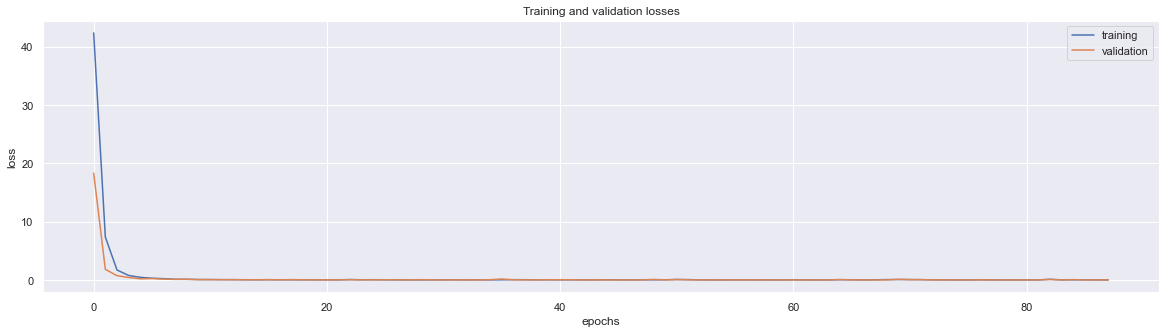

In [15]:
plt.figure(figsize=(20,5))
plt.plot(training_history.history[('loss')])
plt.plot(training_history.history[('val_loss')])
plt.legend(['training', 'validation'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training and validation losses")
plt.show()

### Visualize the MAE values

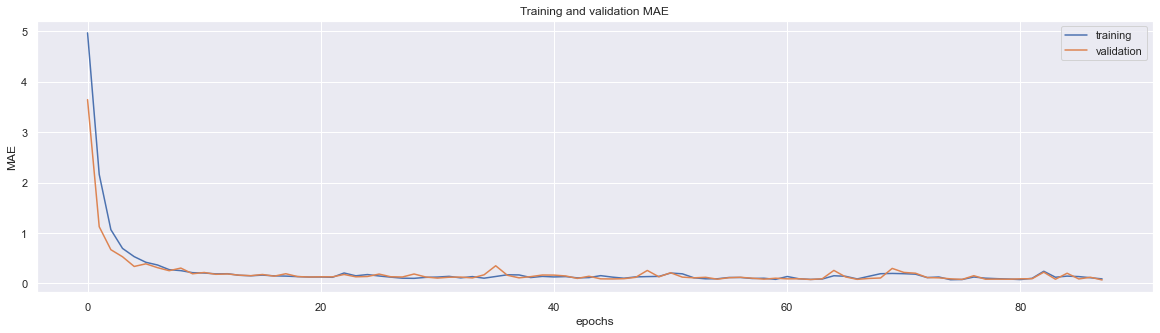

In [16]:
plt.figure(figsize=(20,5))
plt.plot(training_history.history[('mean_absolute_error')][:])
plt.plot(training_history.history[('val_mean_absolute_error')][:])
plt.legend(['training', 'validation'])
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.title("Training and validation MAE")
plt.show()

### Prediction and Testing of Trained model

In [17]:
test_y_pred = model.predict(test_X)

In [18]:
model.evaluate(test_X, test_y)

7/7 [==============================] - 0s 1ms/step - loss: 0.0092 - mean_absolute_error: 0.0763


[0.009233754128217697, 0.07627218961715698]

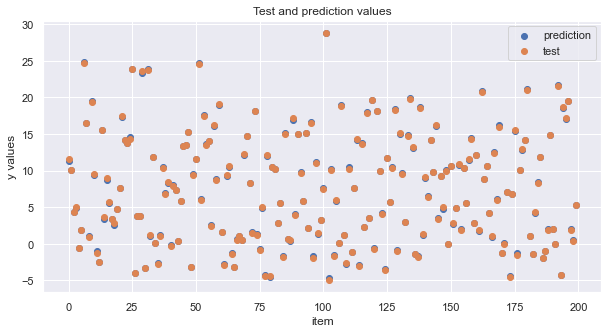

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(list(range(len(test_y_pred))),test_y_pred)
plt.scatter(list(range(len(test_y))),test_y)
plt.legend(['prediction', 'test'])
plt.xlabel("item")
plt.ylabel("y values")
plt.title("Test and prediction values")
plt.show()